In [48]:
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import statistics as s

# import from matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# import from sklearn
from sklearn.model_selection import train_test_split 
from sklearn import metrics

# import models from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [49]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
# count missing values in each column
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [51]:
# count instances
print('Instances:', len(df))

Instances: 150


counts: Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64


C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, '')

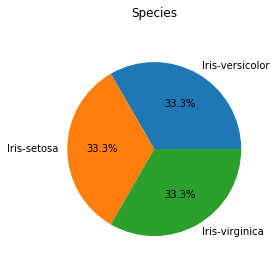

In [52]:
# create pie plot of species
counts = df['species'].value_counts()
print('counts:', counts)
counts.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Species', y=1.08)
plt.axes().set_ylabel('')

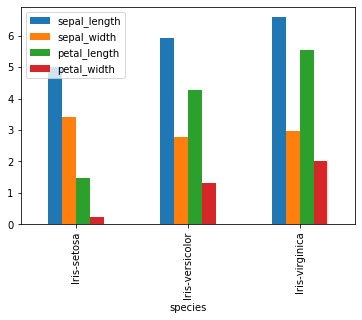

In [53]:
# find means of characteristics by species
means = df.groupby(['species']).mean()
means
means.plot(kind = 'bar')

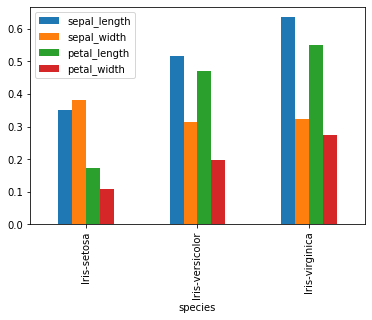

In [54]:
# find means of characteristics by species
stds = df.groupby(['species']).std()
stds
stds.plot(kind = 'bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A2693F6A08>,
      dtype=object)

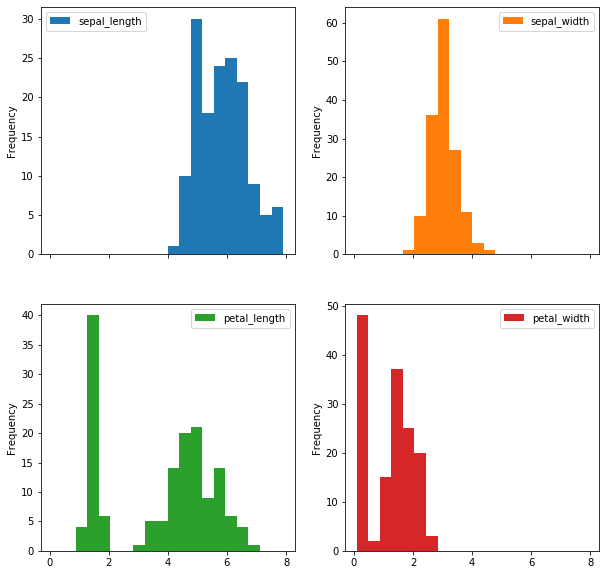

In [55]:
# plot distributions of characteristics
df.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

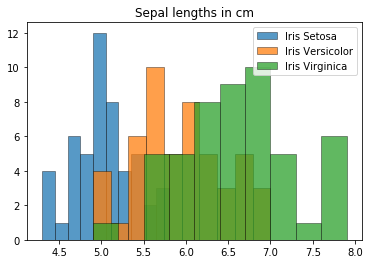

In [56]:
# temporary dataframes by species
df_setosa = df[df['species'] == 'Iris-setosa']
df_versicolor = df[df['species'] == 'Iris-versicolor']
df_virginica = df[df['species'] == 'Iris-virginica']

# subplotting made the text unreadible, so I made four seperate histograms below
# histogram sepal lengths
plt.hist(df_setosa['sepal_length'], 10, alpha=0.75, edgecolor='black', linewidth=0.5, label='Iris Setosa')
plt.hist(df_versicolor['sepal_length'], 10, alpha=0.75, edgecolor='black', linewidth=0.5, label='Iris Versicolor')
plt.hist(df_virginica['sepal_length'], 10, alpha=0.75, edgecolor='black', linewidth=0.5, label='Iris Virginica')
plt.legend(loc='upper right')
plt.title('Sepal lengths in cm')
plt.show()
#plt.savefig('sepal_lengths(1).jpg')

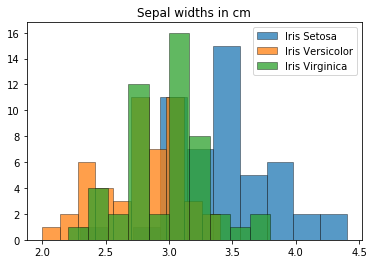

In [57]:
# histogram sepal widths
plt.hist(df_setosa['sepal_width'], 10, alpha=0.75, edgecolor='black', linewidth=0.5, label='Iris Setosa')
plt.hist(df_versicolor['sepal_width'], 10, alpha=0.75, edgecolor='black', linewidth=0.5, label='Iris Versicolor')
plt.hist(df_virginica['sepal_width'], 10, alpha=0.75, edgecolor='black', linewidth=0.5, label='Iris Virginica')
plt.legend(loc='upper right')
plt.title('Sepal widths in cm')
plt.show()
#plt.savefig('sepal_widths(2).jpg')

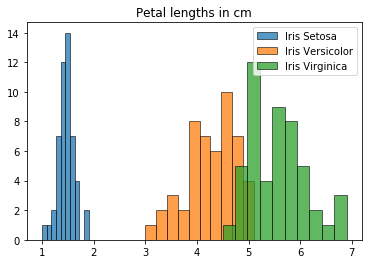

In [58]:
# histogram petal lengths
plt.hist(df_setosa['petal_length'], 10, alpha=0.75, edgecolor='black', linewidth=0.75, label='Iris Setosa')
plt.hist(df_versicolor['petal_length'], 10, alpha=0.75, edgecolor='black', linewidth=0.75, label='Iris Versicolor')
plt.hist(df_virginica['petal_length'], 10, alpha=0.75, edgecolor='black', linewidth=0.75, label='Iris Virginica')
plt.legend(loc='upper right')
plt.title('Petal lengths in cm')
plt.show()
#plt.savefig('petal_widths(3).jpg')

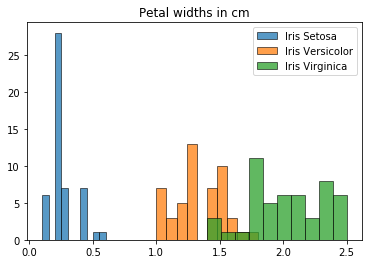

In [59]:
# histogram petal widths
plt.hist(df_setosa['petal_width'], 10, alpha=0.75, edgecolor='black', linewidth=0.75, label='Iris Setosa')
plt.hist(df_versicolor['petal_width'], 10, alpha=0.75, edgecolor='black', linewidth=0.75, label='Iris Versicolor')
plt.hist(df_virginica['petal_width'], 10, alpha=0.75, edgecolor='black', linewidth=0.75, label='Iris Virginica')
plt.legend(loc='upper right')
plt.title('Petal widths in cm')
plt.show()
#plt.savefig('petal_lengths(4).jpg')

In [60]:
# descriptive statistics
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [61]:
# count the amount of outliers for every characteristic by species
species = ['Iris-setosa', 'versicolor', 'virginica']

for i in range(0, len(species)):
    sp_df = df[df['species'] == 'Iris-setosa']
    del sp_df['species']
    print(f'outliers {species[i]}:')
    outliers = sp_df[(np.abs(stats.zscore(sp_df)) >= 3).all(axis=1)]
    print(outliers.count())


outliers Iris-setosa:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64
outliers versicolor:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64
outliers virginica:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64


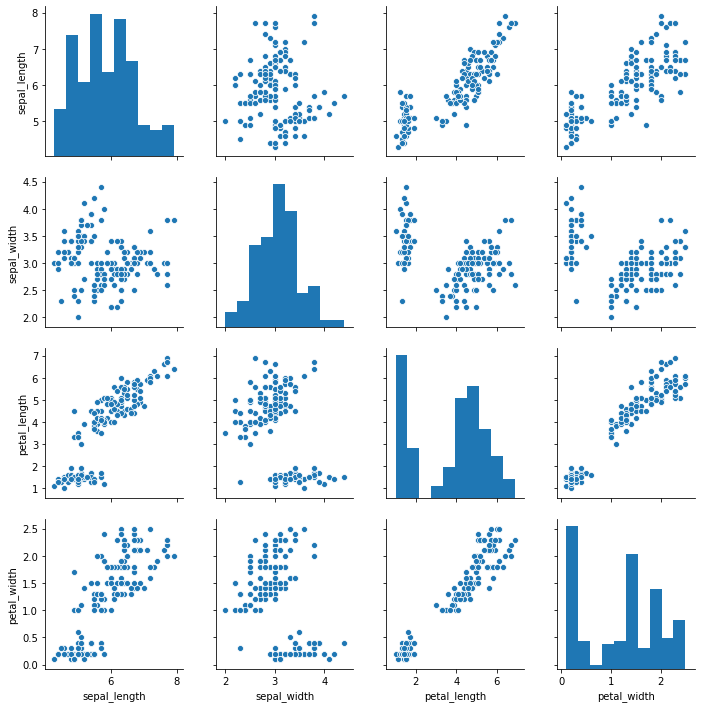

In [62]:
# pairplot
sns.pairplot(df)

In [63]:
# correlations
corr = df.corr()
print(corr)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text xticklabel objects>)

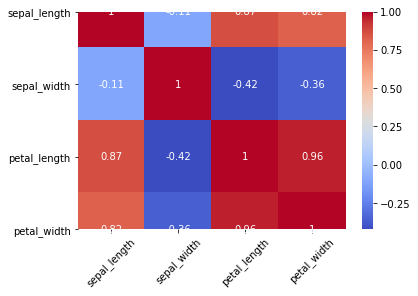

In [64]:
# correlations visualised
sns.heatmap(df.corr(), annot = True, cmap= 'coolwarm')
plt.yticks(rotation=0) 
plt.xticks(rotation=45) 

In [65]:
# linear regression between petal length and petal width
X = df['petal_length'].values.reshape(-1,1)
y = df['petal_width'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_test)

[-0.37635649]
[[0.42118973]]


In [66]:
# print the actual datapoints and the predictions
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df2

,Actual,Predicted
0,2.4,1.771711
1,1.0,1.308402
2,0.2,0.213309
3,1.8,2.277139
4,0.2,0.255428
5,2.5,2.150782
6,0.3,0.171190
7,1.5,1.603235
8,1.4,1.645354
9,1.3,1.308402


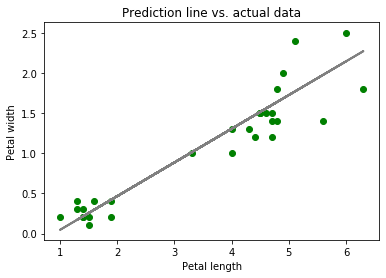

In [67]:
# visualise the outome of linear regression
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='gray', linewidth=2)
plt.title("Prediction line vs. actual data")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

In [68]:
# print the MAE and the MSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error: 0.18355058283010275
Mean Squared Error: 0.06213731552896662


In [69]:
# now the same process, but with 5-fold cross validation
df_shuffle = df.sample(frac=1).reset_index(drop=True)

# divide into 5 folds
fold1 = df_shuffle.loc[0:29]
fold2 = df_shuffle.loc[30:59]
fold3 = df_shuffle.loc[60:89]
fold4 = df_shuffle.loc[90:119]
fold5 = df_shuffle.loc[120:149]

MAEs = []
MSEs = []

for i in range(0, 5):
    folds = [fold1, fold2, fold3, fold4, fold5]
    test = folds[i]
    del folds[i]
    train_set = pd.concat([folds[0], folds[1], folds[2], folds[3]])
    X_train, X_test, y_train, y_test = train_set['petal_length'].values.reshape(-1,1), test['petal_length'].values.reshape(-1,1) , train_set['petal_width'].values.reshape(-1,1), test['petal_width'].values.reshape(-1,1)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    MAE = metrics.mean_absolute_error(y_test, y_pred) 
    MSE = metrics.mean_squared_error(y_test, y_pred)
    print('Mean Absolute Error:', MAE)  
    print('Mean Squared Error:', MSE)
    MAEs.append(MAE)
    MSEs.append(MSE)

# print the eventual outcomes after five folds
print('Mean MAE:', s.mean(MAEs))
print('St. dev. MAE:', s.stdev(MAEs))
print('Mean MSE:', s.mean(MSEs))
print('St. dev. MSE:', s.stdev(MSEs))
    


Mean Absolute Error: 0.1416797541823147
Mean Squared Error: 0.03143458653837525
Mean Absolute Error: 0.13342015554769968
Mean Squared Error: 0.0385900690093474
Mean Absolute Error: 0.18141609547246748
Mean Squared Error: 0.04708807239220683
Mean Absolute Error: 0.18135214140970038
Mean Squared Error: 0.05702974086283286
Mean Absolute Error: 0.15159810959264555
Mean Squared Error: 0.03876546548267097
Mean MAE: 0.15789325124096557
St. dev. MAE: 0.022389073432945522
Mean MSE: 0.04258158685708666
St. dev. MSE: 0.009795511462277673


In [70]:
# assign every species their own color
df_colours = df.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ['b', 'r', 'g'])

([], <a list of 0 Text xticklabel objects>)

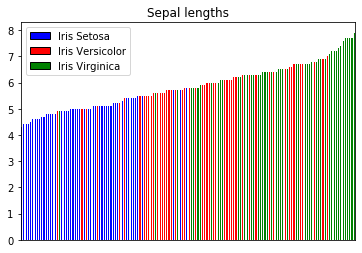

In [100]:
# visualise discretization process for sepal lengths
sep_length = df_colours.sort_values(by=['sepal_length'])
sep_length['sepal_length'].plot(kind = 'bar', color = sep_length['species'], title = 'Sepal lengths')

legend_elements = [Patch(facecolor='b', edgecolor='black',
                         label='Iris Setosa'), Patch(facecolor='r', edgecolor='black',
                         label= 'Iris Versicolor') , Patch(facecolor='g', edgecolor='black',
                         label= 'Iris Virginica')]
plt.legend(handles=legend_elements, loc='upper left')
# The x-ticks were unreadible, so were removed. The plot is stil understandable (the instances are sorted in increasing order)
plt.xticks([], [])

([], <a list of 0 Text xticklabel objects>)

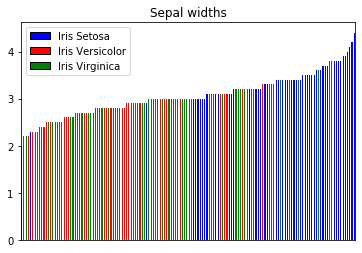

In [101]:
# visualise discretization process for sepal widths
sep_width = df_colours.sort_values(by=['sepal_width'])
sep_width['sepal_width'].plot(kind = 'bar', color = sep_width['species'], title = 'Sepal widths')
plt.legend(handles=legend_elements, loc='upper left')
plt.xticks([], [])

([], <a list of 0 Text xticklabel objects>)

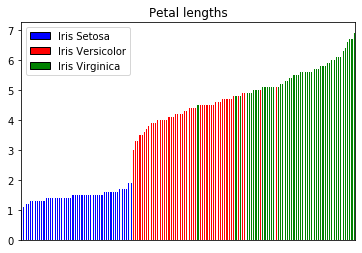

In [102]:
# visualise discretization process for petal lengths
petal_length = df_colours.sort_values(by=['petal_length'])
petal_length['petal_length'].plot(kind = 'bar', color = petal_length['species'], title = 'Petal lengths')
plt.legend(handles=legend_elements, loc='upper left')
plt.xticks([], [])

([], <a list of 0 Text xticklabel objects>)

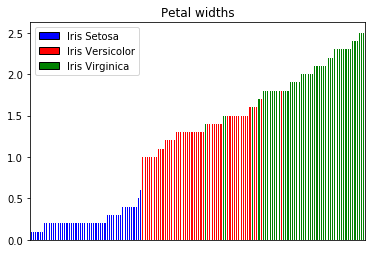

In [103]:
# visualise discretization process for petal widths
petal_width = df_colours.sort_values(by=['petal_width'])
petal_width['petal_width'].plot(kind = 'bar', color = petal_width['species'], title = 'Petal widths')
plt.legend(handles=legend_elements, loc='upper left')
plt.xticks([], [])

In [75]:
# divide everything into first, middle and last one third of measurements
petlength_cut1 = sorted(list(df['petal_length']))[49]
petlength_cut2 =sorted(list(df['petal_length']))[99]
petwidth_cut1 =sorted(list(df['petal_width']))[49]
petwidth_cut2 =sorted(list(df['petal_width']))[99]
seplength_cut1 = sorted(list(df['sepal_length']))[49]
seplength_cut2 =sorted(list(df['sepal_length']))[99]
sepwidth_cut1 =sorted(list(df['sepal_width']))[49]
sepwidth_cut2 =sorted(list(df['sepal_width']))[99]
print(petlength_cut1, petlength_cut2, petwidth_cut1, petwidth_cut2, seplength_cut1, seplength_cut2, sepwidth_cut1, sepwidth_cut2)


1.9 4.9 0.6 1.6 5.4 6.3 2.9 3.2


In [76]:
# changing labels to 'short' for petal_length
df.loc[df['petal_length'] <= petlength_cut1, 'petal_length_label'] = 'short' 
# changing labels to 'medium' for petal_width
df.loc[(df['petal_length'] > petlength_cut1) & (df['petal_length'] <= petlength_cut2), 'petal_length_label'] = 'medium'
# changing labels to 'long' for petal_width
df.loc[df['petal_length'] > petlength_cut2, 'petal_length_label'] = 'long'


# changing labels to 'narrow' for petal_width
df.loc[df['petal_width'] <= petwidth_cut1, 'petal_width_label'] = 'narrow' 
# changing labels to 'medium' for petal_width
df.loc[(df['petal_width'] > petwidth_cut1) & (df['petal_width'] <= petwidth_cut2), 'petal_width_label'] = 'medium'
# changing labels to 'broad' for petal_width
df.loc[df['petal_width'] > petwidth_cut2, 'petal_width_label'] = 'broad'


#Classifier = Decision tree, predictors = sepal length and width, data type = continuous , accuracy = 0.622

X = df[['sepal_length', 'sepal_width']] # Features
y = df['species'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# changing labels to 'short' for sepal_length
df.loc[df['sepal_length'] <= seplength_cut1, 'sepal_length_label'] = 'short' 
# changing labels to 'medium' for sepal_width
df.loc[(df['sepal_length'] > seplength_cut1) & (df['sepal_length'] <= seplength_cut2), 'sepal_length_label'] = 'medium'
# changing labels to 'long' for petal_width
df.loc[df['sepal_length'] > seplength_cut2, 'sepal_length_label'] = 'long'


# changing labels to 'narrow' for sepal_width
df.loc[df['sepal_width'] <= sepwidth_cut1, 'sepal_width_label'] = 'narrow' 
# changing labels to 'medium' for sepal_width
df.loc[(df['sepal_width'] > sepwidth_cut1) & (df['sepal_width'] <= sepwidth_cut2), 'sepal_width_label'] = 'medium'
# changing labels to 'broad' for sepal_width
df.loc[df['sepal_width'] > sepwidth_cut2, 'sepal_width_label'] = 'broad'

Accuracy: 0.6222222222222222


In [77]:
# check labels
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df[['petal_length_label', 'petal_width_label', 'sepal_length_label', 'sepal_width_label']])

    petal_length_label petal_width_label sepal_length_label sepal_width_label
0                short            narrow              short             broad
1                short            narrow              short            medium
2                short            narrow              short            medium
3                short            narrow              short            medium
4                short            narrow              short             broad
5                short            narrow              short             broad
6                short            narrow              short             broad
7                short            narrow              short             broad
8                short            narrow              short            narrow
9                short            narrow              short            medium
10               short            narrow              short             broad
11               short            narrow              short     

In [78]:
# Try some Decision Tree classification with continious data
#Classifier = Decision tree, predictors = petal length and width, data type = continuous , accuracy = 0.956

X = df[['petal_length', 'petal_width']] # Features
y = df['species'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [79]:
#Classifier = Decision tree, predictors = sepal length and width, data type = continuous , accuracy = 0.622

X = df[['sepal_length', 'sepal_width']] # Features
y = df['species'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6222222222222222


In [80]:
# One hot encode the labels for experiments with categorical data
df_with_dummies= pd.get_dummies(df,columns=['petal_length_label', 'petal_width_label', 'sepal_length_label', 'sepal_width_label'],drop_first=False)
df_with_dummies

,sepal_length,sepal_width,petal_length,petal_width,species,petal_length_label_long,petal_length_label_medium,petal_length_label_short,petal_width_label_broad,petal_width_label_medium,petal_width_label_narrow,sepal_length_label_long,sepal_length_label_medium,sepal_length_label_short,sepal_width_label_broad,sepal_width_label_medium,sepal_width_label_narrow
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0,1,0,0,1,0,0,1,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0,1,0,0,1,0,0,1,0,1,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0,1,0,0,1,0,0,1,0,1,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0,1,0,0,1,0,0,1,0,1,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1,0,0,1,0,0,1,0,0,0,1,0
146,6.3,2.5,5.0,1.9,Iris-virginica,1,0,0,1,0,0,0,1,0,0,0,1
147,6.5,3.0,5.2,2.0,Iris-virginica,1,0,0,1,0,0,1,0,0,0,1,0
148,6.2,3.4,5.4,2.3,Iris-virginica,1,0,0,1,0,0,0,1,0,1,0,0


In [81]:
#Try the Decision trees again with categorical data 
#Classifier = Decision tree, predictors = petal length and width, data type = categorical, accuracy = 0.978

X = df_with_dummies[['petal_length_label_long', 'petal_length_label_medium', 'petal_length_label_short', 'petal_width_label_broad', 'petal_width_label_medium', 'petal_width_label_narrow']] # Features
y = df_with_dummies['species'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [82]:
#Classifier = Decision tree, predictors = sepal length and width, data type = categorical , accuracy = 0.756

X = df_with_dummies[['sepal_length_label_long', 'sepal_length_label_medium', 'sepal_length_label_short', 'sepal_width_label_broad', 'sepal_width_label_medium', 'sepal_width_label_narrow']] # Features
y = df_with_dummies['species'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7555555555555555


In [83]:
# Experiments with random forest
#Classifier = Random forest, predictors = petal length and width, data type = continuous , accuracy = 0.956

X = df[['petal_length', 'petal_width']] # Features
y = df['species'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Random forest classifer object
clf = RandomForestClassifier(n_estimators = 50)
# Train Random forest Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [84]:
#Classifier = Random forest, predictors = sepal length and width, data type = continuous , accuracy = 0.667

X = df[['sepal_length', 'sepal_width']] # Features
y = df['species'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Random forest classifer object
clf = RandomForestClassifier(n_estimators = 50)
# Train Random forest Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7111111111111111


In [85]:
#Classifier = Random forest, predictors = petal length and width, data type = categorical, accuracy = 0.978

X = df_with_dummies[['petal_length_label_long', 'petal_length_label_medium', 'petal_length_label_short', 'petal_width_label_broad', 'petal_width_label_medium', 'petal_width_label_narrow']] # Features
y = df_with_dummies['species'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Random forest classifer object
clf = RandomForestClassifier(n_estimators = 50)
# Train Random forest Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [86]:
#Classifier = Random forest, predictors = sepal length and width, data type = categorical , accuracy = 0.711

X = df_with_dummies[['sepal_length_label_long', 'sepal_length_label_medium', 'sepal_length_label_short', 'sepal_width_label_broad', 'sepal_width_label_medium', 'sepal_width_label_narrow']] # Features
y = df_with_dummies['species'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Random forest classifer object
clf = RandomForestClassifier(n_estimators = 50)
# Train Random forest Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7555555555555555


In [87]:
# Experiments with logistic regression and CV. The data are shuffled every time again, but shuffling once is also sufficient.
#Classifier = Logistic regression, 5-fold cross validation, predictors = petal length, data type = categorical, accuracy = 0.947
df_shuffle = df_with_dummies.sample(frac=1).reset_index(drop=True)

fold1 = df_shuffle.loc[0:29]
fold2 = df_shuffle.loc[30:59]
fold3 = df_shuffle.loc[60:89]
fold4 = df_shuffle.loc[90:119]
fold5 = df_shuffle.loc[120:149]

accuracies = []

for i in range(0, 5):
    folds = [fold1, fold2, fold3, fold4, fold5]
    test = folds[i]
    del folds[i]
    train_set = pd.concat([folds[0], folds[1], folds[2], folds[3]])
    X_train, X_test, y_train, y_test = train_set[['petal_length_label_long', 'petal_length_label_medium', 'petal_length_label_short']], test[['petal_length_label_long', 'petal_length_label_medium', 'petal_length_label_short']] , train_set['species'], test['species']
    # Create Decision Tree classifer object
    clf = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs')
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    # Model Accuracy, how often is the classifier correct?
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)                        
    accuracies.append(acc)

print('Mean accuracy:', s.mean(accuracies))
print('St. dev. accuract:', s.stdev(accuracies))

Accuracy: 0.9333333333333333
Accuracy: 0.9
Accuracy: 1.0
Accuracy: 0.9333333333333333
Accuracy: 0.9666666666666667
Mean accuracy: 0.9466666666666667
St. dev. accuract: 0.03800584750330459


In [88]:
#Classifier = Logistic regression, 5-fold cross validation, predictors = petal width, data type = categorical, accuracy = 0.955
df_shuffle = df_with_dummies.sample(frac=1).reset_index(drop=True)

fold1 = df_shuffle.loc[0:29]
fold2 = df_shuffle.loc[30:59]
fold3 = df_shuffle.loc[60:89]
fold4 = df_shuffle.loc[90:119]
fold5 = df_shuffle.loc[120:149]

accuracies = []

for i in range(0, 5):
    folds = [fold1, fold2, fold3, fold4, fold5]
    test = folds[i]
    del folds[i]
    train_set = pd.concat([folds[0], folds[1], folds[2], folds[3]])
    X_train, X_test, y_train, y_test = train_set[['petal_width_label_broad', 'petal_width_label_medium', 'petal_width_label_narrow']], test[['petal_width_label_broad', 'petal_width_label_medium', 'petal_width_label_narrow']] , train_set['species'], test['species']
    # Create Decision Tree classifer object
    clf = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs')
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    # Model Accuracy, how often is the classifier correct?
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)                        
    accuracies.append(acc)

print('Mean accuracy:', s.mean(accuracies))
print('St. dev. accuract:', s.stdev(accuracies))





Accuracy: 0.9666666666666667
Accuracy: 0.9666666666666667
Accuracy: 0.9
Accuracy: 1.0
Accuracy: 0.9666666666666667
Mean accuracy: 0.96
St. dev. accuract: 0.036514837167011066


In [89]:
#Classifier = Logistic regression, 5-fold cross validation, predictors = sepal length, data type = categorical, accuracy = 0.711
df_shuffle = df_with_dummies.sample(frac=1).reset_index(drop=True)

fold1 = df_shuffle.loc[0:29]
fold2 = df_shuffle.loc[30:59]
fold3 = df_shuffle.loc[60:89]
fold4 = df_shuffle.loc[90:119]
fold5 = df_shuffle.loc[120:149]

accuracies = []

for i in range(0, 5):
    folds = [fold1, fold2, fold3, fold4, fold5]
    test = folds[i]
    del folds[i]
    train_set = pd.concat([folds[0], folds[1], folds[2], folds[3]])
    X_train, X_test, y_train, y_test = train_set[['sepal_length_label_long', 'sepal_length_label_medium', 'sepal_length_label_short']], test[['sepal_length_label_long', 'sepal_length_label_medium', 'sepal_length_label_short']] , train_set['species'], test['species']
    # Create Decision Tree classifer object
    clf = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs')
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    # Model Accuracy, how often is the classifier correct?
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)                        
    accuracies.append(acc)

print('Mean accuracy:', s.mean(accuracies))
print('St. dev. accuract:', s.stdev(accuracies))

Accuracy: 0.7666666666666667
Accuracy: 0.7666666666666667
Accuracy: 0.8
Accuracy: 0.7
Accuracy: 0.6
Mean accuracy: 0.7266666666666667
St. dev. accuract: 0.07958224257542218


In [90]:
#Classifier = Logistic regression, 5-fold cross validation, predictors = sepal lenght and width, petal length and width, data type = categorical, accuracy = 0.622
df_shuffle = df_with_dummies.sample(frac=1).reset_index(drop=True)

fold1 = df_shuffle.loc[0:29]
fold2 = df_shuffle.loc[30:59]
fold3 = df_shuffle.loc[60:89]
fold4 = df_shuffle.loc[90:119]
fold5 = df_shuffle.loc[120:149]

accuracies = []

for i in range(0, 5):
    folds = [fold1, fold2, fold3, fold4, fold5]
    test = folds[i]
    del folds[i]
    train_set = pd.concat([folds[0], folds[1], folds[2], folds[3]])
    X_train, X_test, y_train, y_test = train_set[['sepal_width_label_broad', 'sepal_width_label_medium', 'sepal_width_label_narrow', 'sepal_length_label_long', 'sepal_length_label_medium', 'sepal_length_label_short', 'petal_width_label_broad', 'petal_width_label_medium', 'petal_width_label_narrow', 'petal_length_label_long', 'petal_length_label_medium', 'petal_length_label_short']], test[['sepal_width_label_broad', 'sepal_width_label_medium', 'sepal_width_label_narrow', 'sepal_length_label_long', 'sepal_length_label_medium', 'sepal_length_label_short', 'petal_width_label_broad', 'petal_width_label_medium', 'petal_width_label_narrow', 'petal_length_label_long', 'petal_length_label_medium', 'petal_length_label_short']] , train_set['species'], test['species']
    # Create Decision Tree classifer object
    clf = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs')
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    # Model Accuracy, how often is the classifier correct?
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)                        
    accuracies.append(acc)

print('Mean accuracy:', s.mean(accuracies))
print('St. dev. accuract:', s.stdev(accuracies))


Accuracy: 0.9333333333333333
Accuracy: 1.0
Accuracy: 0.9333333333333333
Accuracy: 1.0
Accuracy: 0.9666666666666667
Mean accuracy: 0.9666666666666667
St. dev. accuract: 0.033333333333333326


In [91]:
#Classifier = Logistic regression, predictors = petal length and width, data type = categorical, accuracy = 0.978
df_shuffle = df_with_dummies.sample(frac=1).reset_index(drop=True)

fold1 = df_shuffle.loc[0:29]
fold2 = df_shuffle.loc[30:59]
fold3 = df_shuffle.loc[60:89]
fold4 = df_shuffle.loc[90:119]
fold5 = df_shuffle.loc[120:149]

accuracies = []

for i in range(0, 5):
    folds = [fold1, fold2, fold3, fold4, fold5]
    test = folds[i]
    del folds[i]
    train_set = pd.concat([folds[0], folds[1], folds[2], folds[3]])
    X_train, X_test, y_train, y_test = train_set[['petal_length_label_long', 'petal_length_label_medium', 'petal_length_label_short','petal_width_label_broad', 'petal_width_label_medium', 'petal_width_label_narrow']], test[['petal_length_label_long', 'petal_length_label_medium', 'petal_length_label_short','petal_width_label_broad', 'petal_width_label_medium', 'petal_width_label_narrow']] , train_set['species'], test['species']
    # Create Decision Tree classifer object
    clf = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs')
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    # Model Accuracy, how often is the classifier correct?
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)                        
    accuracies.append(acc)

print('Mean accuracy:', s.mean(accuracies))
print('St. dev. accuract:', s.stdev(accuracies))

Accuracy: 1.0
Accuracy: 0.9666666666666667
Accuracy: 0.9333333333333333
Accuracy: 0.9666666666666667
Accuracy: 0.9666666666666667
Mean accuracy: 0.9666666666666667
St. dev. accuract: 0.02357022603955158


In [92]:
#Classifier = Logistic regression, predictors = sepal length and width, data type = categorical , accuracy = 0.711


X = df_with_dummies[['sepal_length_label_long', 'sepal_length_label_medium', 'sepal_length_label_short', 'sepal_width_label_broad', 'sepal_width_label_medium', 'sepal_width_label_narrow']] # Features
y = df_with_dummies['species'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs')
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7111111111111111


In [93]:
# Trying some Naive Bayes experiments
#Classifier = Naive Bayes, predictors = petal length and width, data type = continuous , accuracy = 0.956

X = df[['petal_length', 'petal_width']] # Features
y = df['species'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = GaussianNB()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [94]:
#Classifier = Naive Bayes, predictors = sepal length and width, data type = continuous , accuracy = 0.756

X = df[['sepal_length', 'sepal_width']] # Features
y = df['species'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Naive Bayes classifer object
clf = GaussianNB()
# Train Naive Bayes Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7555555555555555


In [95]:
#Classifier = Naive Bayes, predictors = petal length and width, data type = categorical, accuracy = 0.978

X = df_with_dummies[['petal_length_label_long', 'petal_length_label_medium', 'petal_length_label_short', 'petal_width_label_broad', 'petal_width_label_medium', 'petal_width_label_narrow']] # Features
y = df_with_dummies['species'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Naive Bayes classifer object
clf = GaussianNB()
# Train Naive Bayes Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [96]:
#Classifier = Naive Bayes, predictors = septal length and width, data type = categorical, accuracy = 0.933

X = df_with_dummies[['sepal_length_label_long', 'sepal_length_label_medium', 'sepal_length_label_short', 'sepal_width_label_broad', 'petal_width_label_medium', 'petal_width_label_narrow']] # Features
y = df_with_dummies['species'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Naive Bayes classifer object
clf = GaussianNB()
# Train Naive Bayes Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333
